<img src='../img/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='10%'></img>

<br>

# Copernicus Sentinel-5 Precursor (Sentinel-5P) Level 2 Nitrogen Dioxide - Explore

The subsequent example introduces you to Sentinel-5P data in general and the Level 2 product of tropospheric column of Nitrogen Dioxide (NO<sub>2</sub>) sensed by Sentinel-5P. Nitrogen Dioxide is a good trace gas to monitor air quality. The example will show you the Nitrogen Dioxide values for 5 February 2021 over Europe.

#### Module outline:
* [1 - Load and browse Sentinel-5P TROPOMI data](#load_s5p)
* [2 - Create a geographical subset](#geographical_subset)
* [3 - Visualize Sentinel-5P LeveL 2 Nitrogen Dioxide tropospheric column ](#plotting_s5p)

#### Load required libraries

In [ ]:
import xarray as xr
import zipfile

import matplotlib.pyplot as plt
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [ ]:
%run ../functions.ipynb

<hr>

## <a id="load_s5p"></a>Load and browse Sentinel-5P data

WEkEO downloads Sentinel-5P data files as a zip archive. Thus, the first step is to extract the real data file (which are disseminated in the NetCDF format) from the zip archive. You can do this with the Python library `zipfile`. The command creates a folder with the same name of the zip archive. Within this folder, there is a netCDF data file.

In [132]:
with zipfile.ZipFile('./data/S5P_NRTI_L2__NO2____20210205T115048_20210205T115548_17182_01_010400_20210205T124444.nc.zip', 'r') as zip_ref:
    zip_ref.extractall('./data/')

Sentinel-5P files are organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index
* `layer`: this dimension indicates the vertical grid of profile variables

Once extracted from the zip archive, Sentinel-5P data is disseminated in the `netCDF` format. Let us load the netCDF file with the xarray function `xr.open_dataset()`. You have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group

Let us load the extracted Sentinel-5P data file as `xarray.Dataset` and inspect the data structure:

In [133]:
s5p = xr.open_dataset('./data/S5P_NRTI_L2__NO2____20210205T115048_20210205T115548_17182_01_010400_20210205T124444/S5P_NRTI_L2__NO2____20210205T115048_20210205T115548_17182_01_010400_20210205T124444.nc', group='PRODUCT')
s5p


<xarray.Dataset>
Dimensions:                                               (scanline: 373,
                                                           ground_pixel: 450,
                                                           time: 1, corner: 4,
                                                           polynomial_exponents: 6,
                                                           intensity_offset_polynomial_exponents: 1,
                                                           layer: 34,
                                                           vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                              (time, scanline, ground_pixel) float32 ...
    longitude                                             (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                                            (time, scanline) datetime64[ns] ...
    time_utc                                              (time, scanline) object ...
    qa_value                                              (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 ...
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 ...
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 ...
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 ...
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) float64 ...
    tm5_constant_a                                        (layer, vertices) float32 ...
    tm5_constant_b                                        (layer, vertices) float32 ...

You see that the loaded dataset contains of eight dimensions and twelve data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`
  * `polynomial_exponents`
  * `intensity_offset_polynomial_exponents`
  * `layer`
  * `vertices`

* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `nitrogendioxide_tropospheric_column`: Vertically integrated NO2 tropospheric column density
  * `nitrogendioxide_tropospheric_column_precision`: Standard error of the vertically integrated NO2 tropospheric column
  * ...

You can specify one variable of interest and get more detailed information about the variable. E.g. `nitrogendioxide_tropospheric_column` is the troposphere mole content of nitrogen dioxide, has the unit mol / m<sup>2</sup>, and has three dimensions, `time`, `scanline` and `groundpixel` respectively.

In [134]:
s5p_no2 = s5p['nitrogendioxide_tropospheric_column']
s5p_no2

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (time: 1,
                                                         scanline: 373,
                                                         ground_pixel: 450)>
[167850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2021-02-05
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

You can repeat the same operation for the other available variables, but also for the dimensions latitude and longitude, to get a better overview of the geographic dimension.

In [135]:
print('Latitude')
print(s5p_no2.latitude)

print('Longitude')
print(s5p_no2.longitude)

Latitude
<xarray.DataArray 'latitude' (time: 1, scanline: 373, ground_pixel: 450)>
[167850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2021-02-05
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
Longitude
<xarray.DataArray 'longitude' (time: 1, scanline: 373, ground_pixel: 450)>
[167850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * 

<br>

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`. Let us extract the only time step of the dataset.

In [136]:
s5p_no2_0705 = s5p_no2[0,:,:]
s5p_no2_0705

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 373,
                                                         ground_pixel: 450)>
[167850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2021-02-05
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

The attributes of the data array hold the entry `multiplication_factor_to_convert_to_molecules_percm2`, which is a conversion factor that has to be applied to convert the data from mol / m<sup>2</sup> to molecules / cm<sup>2</sup>. Let us store the multiplication factor as variable.


In [137]:
conversion_factor = s5p_no2_0705.multiplication_factor_to_convert_to_molecules_percm2
conversion_factor

6.02214e+19

Additionally, you can save the attribute `longname`, which can become handy during the visualisation of the data.

In [138]:
longname = s5p_no2_0705.long_name
longname

'Tropospheric vertical column of nitrogen dioxide'

## <a id='geographical_subset'></a>Create  a geographical subset

You can zoom into a region by specifying a `bounding box` of interest. Let's set the extent to central Eurpe with the following bounding box information:

In [139]:
lonmin=-21
lonmax=31
latmin=32
latmax=60

You can use the function [generate_geographical_subset()](../functions.ipynb#generate_geographical_subset) to subset an xarray.DataArray based on a given bounding box.

In [140]:
s5p_no2_subset = generate_geographical_subset(s5p_no2_0705, latmin, latmax, lonmin, lonmax)
s5p_no2_subset

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 373,
                                                         ground_pixel: 440)>
array([[          nan, 1.2742111e-05, 5.1321681e-06, ...,           nan,
                  nan,           nan],
       [          nan, 8.5216761e-06, 1.7971706e-05, ...,           nan,
                  nan,           nan],
       [          nan, 9.2884375e-06, 6.7207466e-06, ...,           nan,
                  nan,           nan],
       ...,
       [          nan, 1.7638051e-05, 1.9458383e-05, ..., 4.1437212e-05,
        8.9141824e-05, 9.3425173e-05],
       [          nan, 3.3548549e-05, 1.4549579e-05, ..., 8.2100567e-05,
        1.4284477e-04, 1.0296928e-04],
       [          nan, 1.3389636e-05, 1.2364226e-05, ..., 1.5043696e-04,
        1.6229774e-04, 1.6538022e-04]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 437.0 438.0 439.0
    time          datetime64[ns] 2021-02-05
    latitude      (scanline, ground_pixel) float32 34.98 35.03 ... 58.86 58.85
    longitude     (scanline, ground_pixel) float32 3.23 3.318 ... 30.81 30.95
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

## <a id="plotting_s5p"></a>Visualisation of Sentinel-5P Level 2 Nitrogen Dioxide data

You can plot data array in Python with matplotlib's `pcolormesh()` function. In combination with the library [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality projected maps.

In order to make it easier to visualize the Nitrogen Dioxide values of the tropospheric column, we apply the conversion factor to the data array. This converts the Nitrogen Dioxide tropospheric column values from mol per m<sup>2</sup> to molecules per cm<sup>2</sup>.

In [141]:
s5p_no2_converted = s5p_no2_subset*conversion_factor
s5p_no2_converted

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 373,
                                                         ground_pixel: 440)>
array([[          nan, 7.6734772e+14, 3.0906635e+14, ...,           nan,
                  nan,           nan],
       [          nan, 5.1318725e+14, 1.0822813e+15, ...,           nan,
                  nan,           nan],
       [          nan, 5.5936272e+14, 4.0473275e+14, ...,           nan,
                  nan,           nan],
       ...,
       [          nan, 1.0621881e+15, 1.1718111e+15, ..., 2.4954069e+15,
        5.3682453e+15, 5.6261946e+15],
       [          nan, 2.0203405e+15, 8.7619601e+14, ..., 4.9442112e+15,
        8.6023122e+15, 6.2009541e+15],
       [          nan, 8.0634260e+14, 7.4459097e+14, ..., 9.0595238e+15,
        9.7737972e+15, 9.9594279e+15]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 437.0 438.0 439.0
    time          datetime64[ns] 2021-02-05
    latitude      (scanline, ground_pixel) float32 34.98 35.03 ... 58.86 58.85
    longitude     (scanline, ground_pixel) float32 3.23 3.318 ... 30.81 30.95

For visualization, you can use the function [visualize_pcolormesh()](../functions#visualize_pcolormesh). The following kwargs have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_scale`
* `unit`
* `long_name`
* `vmin`, `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

Now, let us apply the [visualize_pcolormesh()](../functions#visualize_pcolormesh) function and visualize the tropospheric column of Nitrogen Dioxided sensored from the Sentinel-5P satellite on 7 May 2022.

Note: Multiplying the DataArray values with 1e<sup>-15</sup> improves the readibility of the map legend.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Tropospheric vertical column of nitrogen dioxide - 2021-02-05'}>)

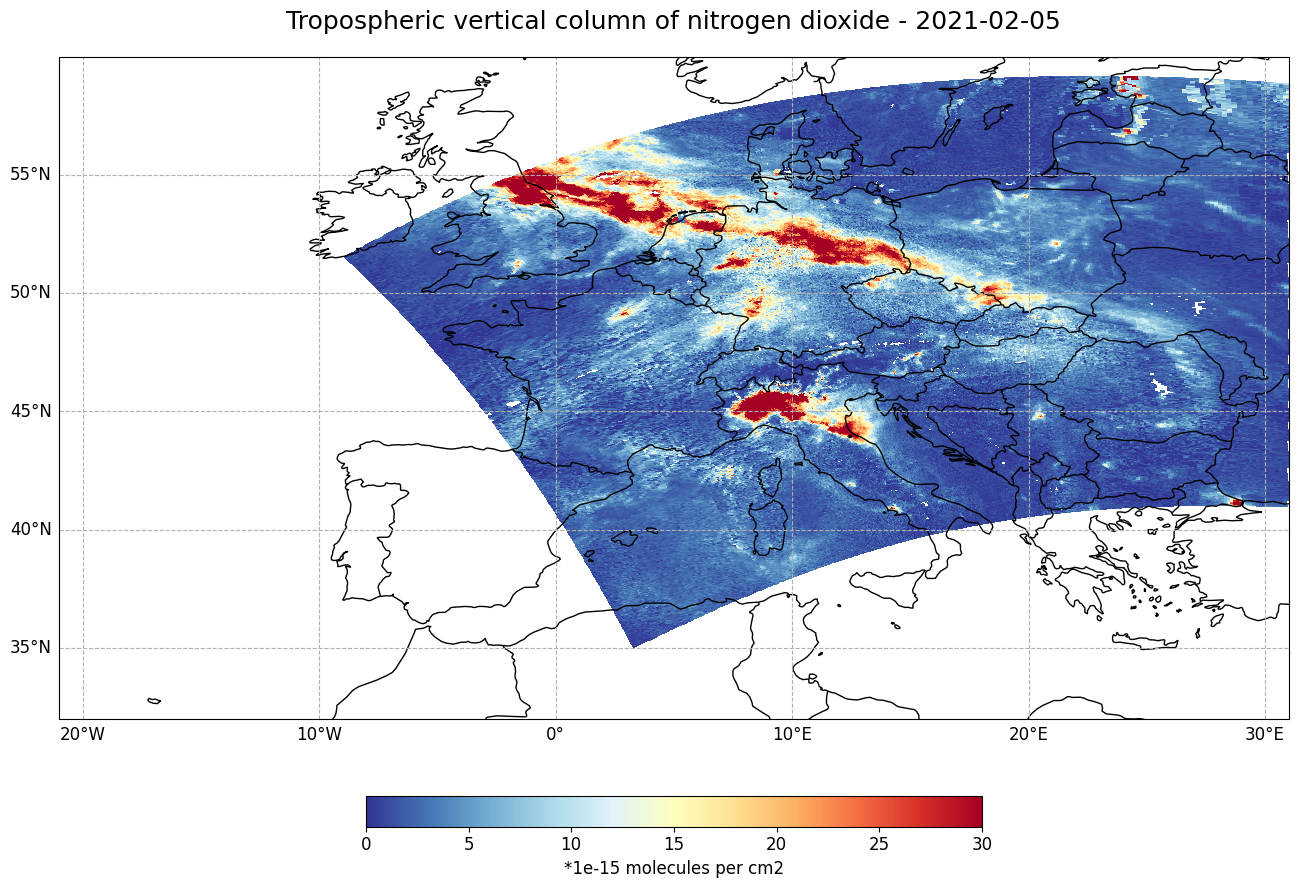

In [144]:
visualize_pcolormesh(data_array = s5p_no2_converted*1e-15, 
                     longitude = s5p_no2_converted.longitude, 
                     latitude = s5p_no2_converted.latitude, 
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'RdYlBu_r', 
                     unit = '*1e-15 molecules per cm2', 
                     long_name = longname + ' - ' + str(s5p_no2_converted.time.data)[0:10], 
                     vmin = 0, 
                     vmax = 30,
                     set_global=False,
                     latmin=latmin,
                     latmax=latmax,
                     lonmin=lonmin,
                     lonmax=lonmax)


<br>

<hr>